In [14]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, recall_score, precision_score, confusion_matrix, average_precision_score

In [15]:
train_df = pd.read_csv("../Train_Set.csv")
test_df = pd.read_csv("../Test_Set.csv")

X_train, y_train = train_df.drop(columns=["class_label"]), (train_df["class_label"] == "cancer").astype(int)
X_test , y_test  = test_df.drop(columns=["class_label"]) , (test_df["class_label"] == "cancer").astype(int)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
svm = SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42)
svm.fit(X_train, y_train)

proba = svm.predict_proba(X_test)[:, 1]                    # P(cancer)
precision, recall, threshold = precision_recall_curve(y_test, proba)
idx  = np.where(recall[:-1] >= 0.95)[0]                     # align with thr
best = idx[np.argmax(precision[idx])]
t    = threshold[best]

y_pred = (proba >= t).astype(int)

print("threshold :", t)
print("recall    :", recall_score(y_test, y_pred))
print("precision :", precision_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
print(pd.DataFrame(cm,
                   index=["actual_cancer", "actual_healthy"],
                   columns=["pred_cancer", "pred_healthy"]))


threshold : 0.7125011532816641
recall    : 0.9592391304347826
precision : 0.9438502673796791
                pred_cancer  pred_healthy
actual_cancer           353            15
actual_healthy           21            20


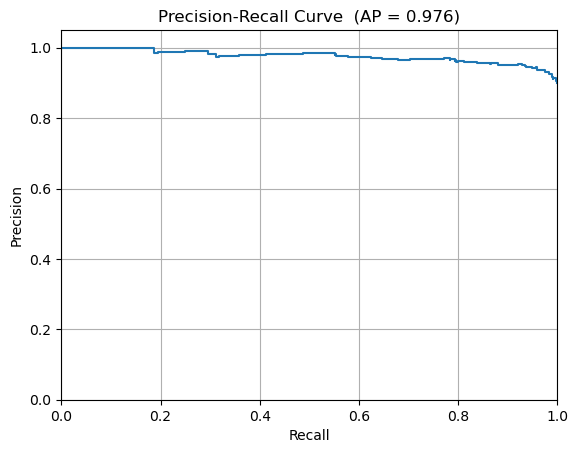

In [17]:
ap = average_precision_score(y_test, proba)

plt.step(recall, precision, where="post")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve  (AP = {ap:.3f})")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)
plt.show()